In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the necessary libraries
import numpy as np        # for linear algebra and arrays
import pandas as pd       # for data processing
from matplotlib import pyplot as plt        # for data visualization
import seaborn as sns         # for data visualization
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read in the datasets i.e. train and test
train = pd.read_csv('/content/drive/My Drive/Umoja_Hack Datasets/UmojaHack#3_Hotspots/train.csv', parse_dates=['date'])
test = pd.read_csv('/content/drive/My Drive/Umoja_Hack Datasets/UmojaHack#3_Hotspots/test.csv', parse_dates=['date'])

In [ ]:
# Preview the dataset
train.head(2)

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,158.387765,8.000000,498.913776,2143.430034,0.0,206.935453,323.873675,2508.795159,115.989282,129.825024,590.564102,0.0,0.0,0.350169,0.0,0.649524,0.0,0.000307,0.0,0.0,2.214262,0.198996
1,1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,164.645065,8.104576,590.346191,2132.253953,0.0,204.835170,321.838884,2500.432319,112.619789,129.471370,611.544277,0.0,0.0,0.429049,0.0,0.570644,0.0,0.000307,0.0,0.0,3.833042,0.188071


In [ ]:
# Quick statistical summary of the dataset (Columns with number values)
train.describe()

,area,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
count,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,6.266440e+05,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,6.266440e+05,626644.000000,626644.000000,626644.000000,626644.000000,626644.000000,607128.000000,626644.000000
mean,1910.000000,23.743978,-2.859994,0.014904,868.907429,223.509282,-258.714705,1092.416972,125.868639,38.823932,939.460119,1893.144819,6.250306e-07,185.718004,299.149100,2331.859903,88.471160,142.974786,691.938221,0.012452,0.000036,0.771477,1.397882e-07,0.188189,0.000266,0.026382,0.000040,0.001157,30.022468,0.181763
std,1103.028532,3.892348,4.397921,0.061526,287.975104,372.066304,331.469776,170.072823,86.558539,55.748898,665.643975,269.334818,3.648428e-04,24.548665,18.169408,391.920264,33.756141,49.427436,330.924429,0.088407,0.000709,0.327120,7.314258e-06,0.314002,0.004851,0.086140,0.000533,0.009156,175.864136,0.130271
min,0.000000,12.416000,-13.394000,0.000000,7.438208,0.000000,-1387.832916,510.639390,0.000000,0.000000,21.507944,696.514959,0.000000e+00,38.863690,148.171487,806.692753,0.000000,47.621263,40.145363,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,955.000000,20.741000,-6.146000,0.000000,781.852462,0.000000,-467.326288,973.879811,54.756412,2.998071,385.369020,1707.282363,0.000000e+00,176.514720,291.448015,2152.248206,66.639851,106.740654,450.612068,0.000000,0.000000,0.590311,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.140170,0.078666
50%,1910.000000,24.107000,-2.945000,0.000000,954.076835,0.000000,-293.756227,1068.663459,128.187523,8.000000,772.587434,1890.893983,0.000000e+00,191.908987,300.363332,2434.875742,80.557314,133.116391,598.579235,0.000000,0.000000,0.975270,0.000000e+00,0.000000,0.000000,0.000307,0.000000,0.000000,14.146377,0.171292
75%,2865.000000,26.956000,0.857000,0.000000,1056.306879,333.155481,-110.273937,1184.196489,184.165079,63.968079,1362.433666,2078.610153,0.000000e+00,201.358784,309.136060,2613.203412,101.447069,170.041921,865.704085,0.000000,0.000000,1.000000,0.000000e+00,0.298845,0.000000,0.010451,0.000000,0.000000,26.957529,0.261780
max,3820.000000,31.096000,5.296000,0.952641,1666.262670,2048.897442,1131.222423,2125.220848,1111.881507,1028.775818,3508.381210,2962.535010,2.772480e-01,251.821796,374.382920,3192.843792,313.996748,463.386183,2711.961772,1.000000,0.044034,1.000000,6.147222e-04,1.000000,0.197675,0.991276,0.023099,0.478727,9514.004270,1.187434


In [ ]:
# Fill the null values in the population density column with the value from the previous row
train['population_density'] = train['population_density'].fillna(method='bfill')

In [ ]:
# Check to ensure columns are of the correct data types
train.dtypes

ID                            object
area                           int64
date                  datetime64[ns]
lat                          float64
lon                          float64
burn_area                    float64
climate_aet                  float64
climate_def                  float64
climate_pdsi                 float64
climate_pet                  float64
climate_pr                   float64
climate_ro                   float64
climate_soil                 float64
climate_srad                 float64
climate_swe                  float64
climate_tmmn                 float64
climate_tmmx                 float64
climate_vap                  float64
climate_vpd                  float64
climate_vs                   float64
elevation                    float64
landcover_0                  float64
landcover_1                  float64
landcover_2                  float64
landcover_3                  float64
landcover_4                  float64
landcover_5                  float64
l

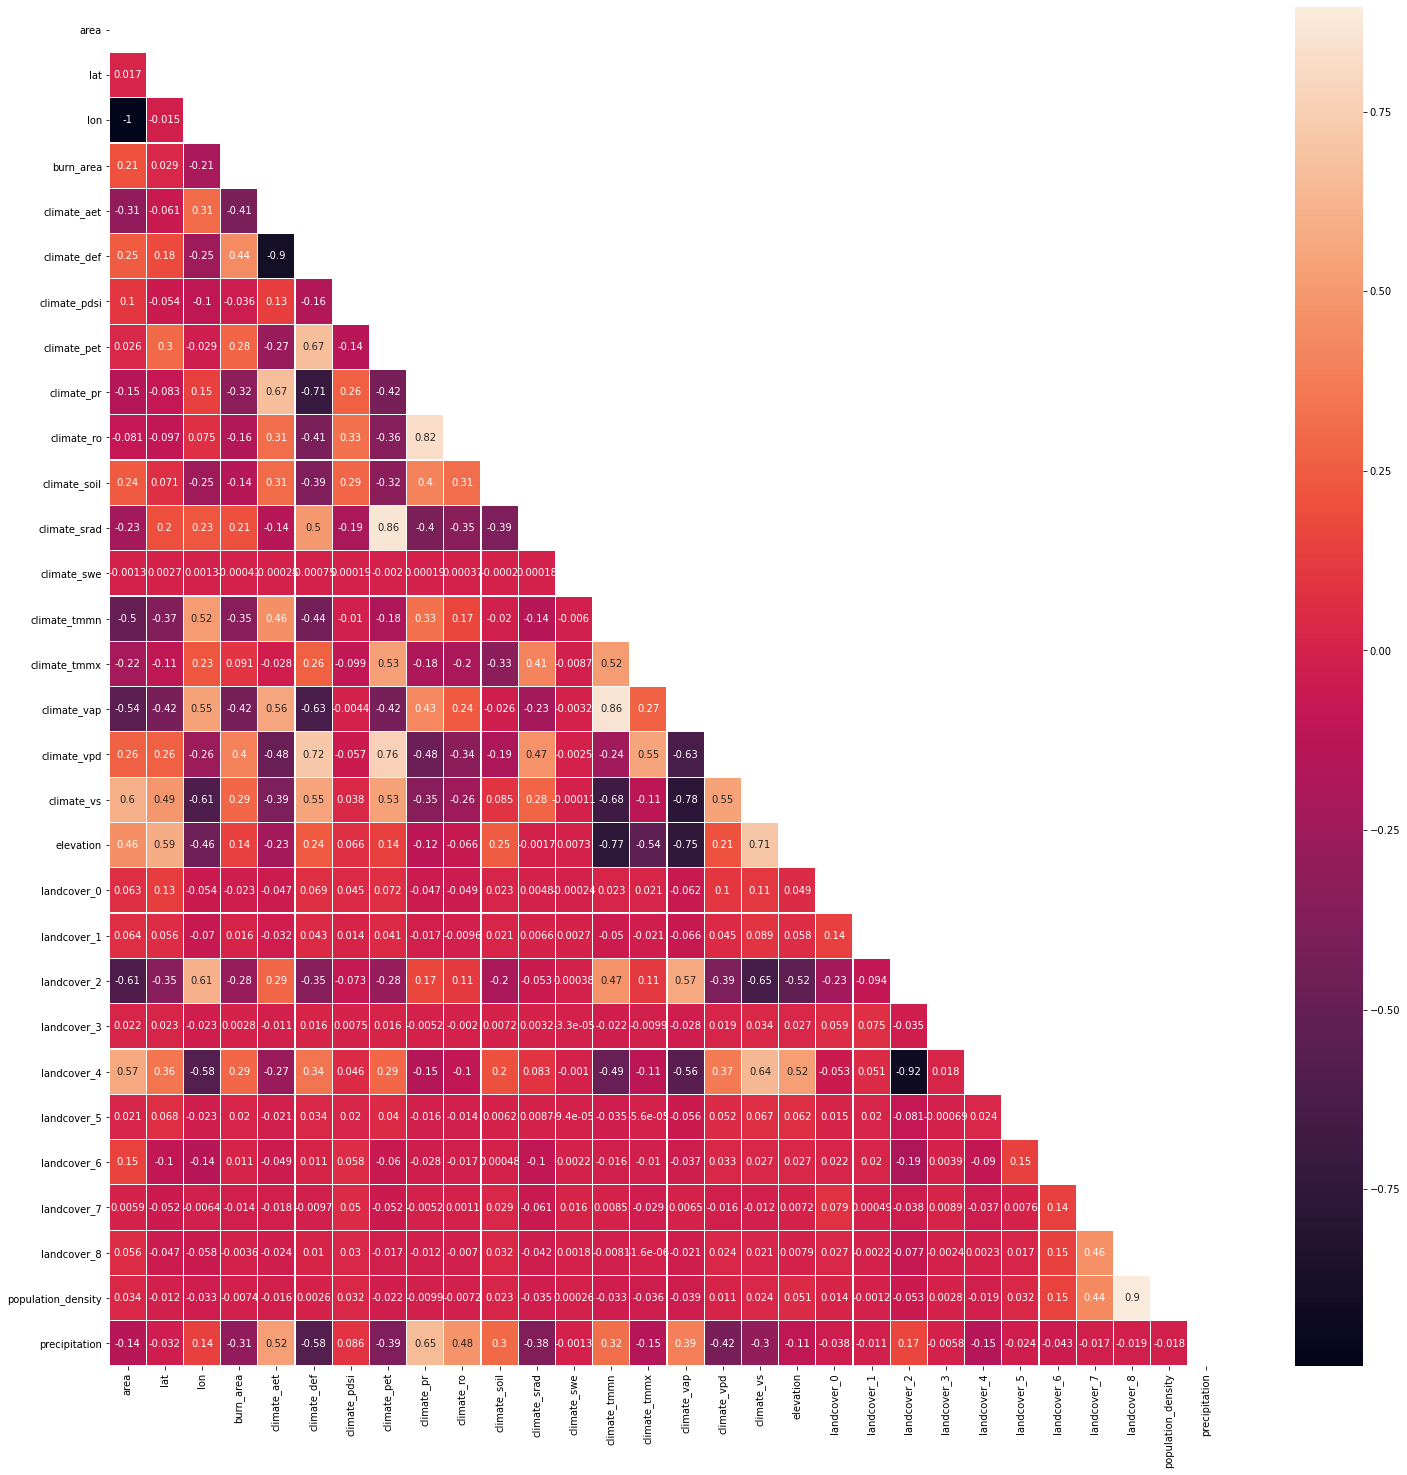

In [ ]:
# Check for the correlation of the features against each other and visualize it with a heatmap
fig, ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
matrix = np.triu(train.drop(['date', 'ID'], axis=1).corr())
sns.heatmap(train.drop(['date', 'ID'], axis=1).corr(), annot = True, linewidths=0.3, ax=ax, mask=matrix)

From the heatmap its evident that population density doesn't affect the precipitation while climate_aet which is the measure of evapotranspiration strongly affects precipitation. 

Landcover_8 which is urban and built-up Lands has a high correlation with the population density which implies that such areas are highly populated hence the urbanisation aspect of the land

Landcover_4 which is dominated by deciduous broadleaf trees and shrubs appears to be an elevated or on a slope because of the high correlation with elevation and the wind speed is also high on this landcover

This are just some of the insights from the heatmap that give us an overview of the features relation to each other

The main purpose of this heatmap is to identify correlations between the features themselves that might help us know how they correlate with each other before we check how the features correlate with the target feature

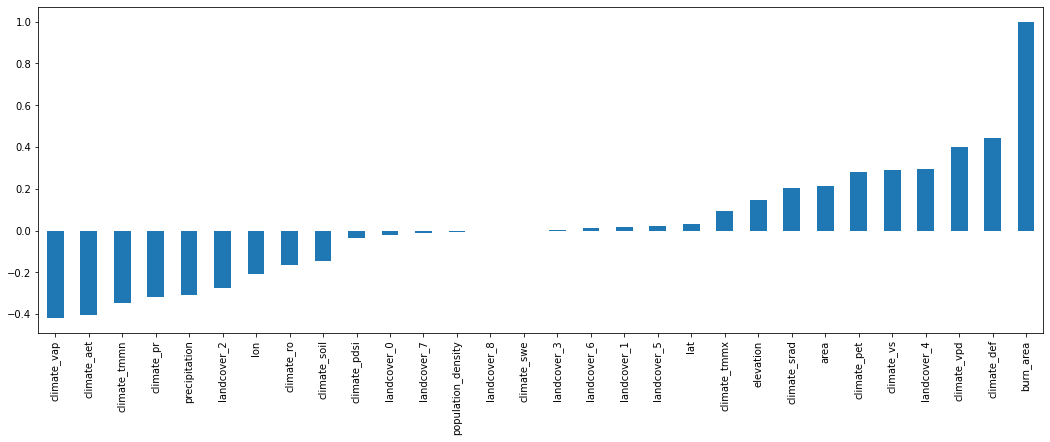

In [ ]:
# Check the correlation of the features with a focus on the target which is the burn_area
train.corr()['burn_area'].sort_values().plot(kind='bar', figsize=(18, 6))

From this focus on the burn_area there seems to be no correlation between landcover_8 i.e urban built-up lands and climate_swe i.e. snow water equivalent bacause there is less forest cover in the built up lands and the DRC lies in tropical lands hence no snow water equivalent respectively

Features with a negative correlation indicate that there is a negative correlation between those features and the burn_area e.g. is as precipitation increases, there is a reduction in the burn_area, when there is low temperatures i.e. climate_tmmn there is a smaller burn area

In [ ]:
# Lets have a closer look at some of the individual features against the burn_area
# Create a sample of the population

# First we shuffle the dataset then get a sample of it
from sklearn.utils import shuffle
shuffled_df = shuffle(train)

sample = shuffled_df.sample(20000)

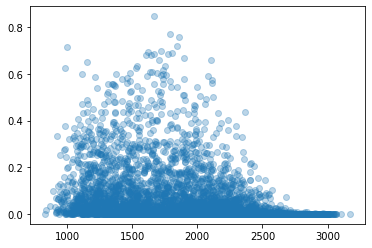

In [ ]:
# Plot a scatter plot of climate_vap (vapor pressure) against the burn_area
plt.scatter(sample['climate_vap'], sample['burn_area'], alpha=0.3)

Its evident that the burn_area is large when there is low vapor pressure

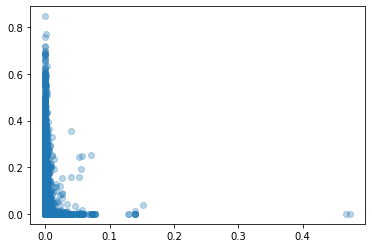

In [ ]:
# Plot a scatter plot of landcover_8 (urban built-up lands) against the burn_area
plt.scatter(sample['landcover_8'], sample['burn_area'], alpha=0.3)

There doesn't seem to be any correlation between urban built-up lands and the burn_area

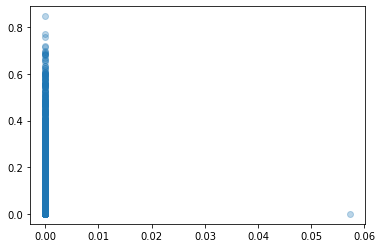

In [ ]:
# Plot a scatter plot of climate_swe (snow water equivalent) against the burn_area
plt.scatter(sample['climate_swe'], sample['burn_area'], alpha=0.3)

There doesn't seem to be any correlation between snow water equivalent and the burn_area

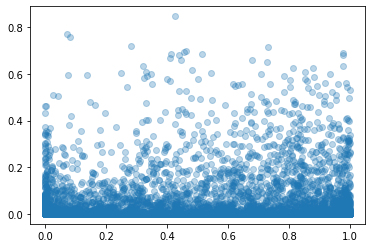

In [ ]:
# Plot a scatter plot of landcover_4 (dominated by deciduous broadleaf) against the burn_area
plt.scatter(sample['landcover_4'], sample['burn_area'], alpha=0.3)

There seems to be a positive correlation between lands dominated by deciduous broadleaf to the burn_area since they are elevated have higher wind speeds

In [ ]:
# Decompose the date to month and year to analyse for any trends
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

train.head(2)

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,month,year
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,158.387765,8.000000,498.913776,2143.430034,0.0,206.935453,323.873675,2508.795159,115.989282,129.825024,590.564102,0.0,0.0,0.350169,0.0,0.649524,0.0,0.000307,0.0,0.0,2.214262,0.198996,4,2000
1,1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,164.645065,8.104576,590.346191,2132.253953,0.0,204.835170,321.838884,2500.432319,112.619789,129.471370,611.544277,0.0,0.0,0.429049,0.0,0.570644,0.0,0.000307,0.0,0.0,3.833042,0.188071,4,2000


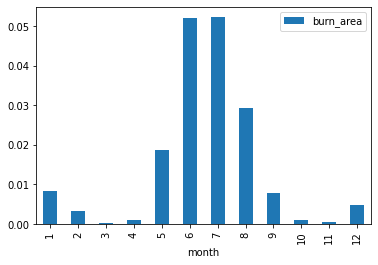

In [ ]:
# Check for monthly trends of the burn_area by plotting a mean of the burn_area for each month
train.groupby('month').mean().reset_index().plot(x='month', y='burn_area', kind='bar')

From the above visualization, its evident that there is are larger burn areas in the months from May to August. 

The DRC has a short dry season (January - February), a short wet season (March – April), a long dry season (May to September) and a long wet season (October to December). [link](https://journeysbydesign.com/destinations/democratic-republic-of-congo/when-to-go)

This explains the data as respresented in the graph above

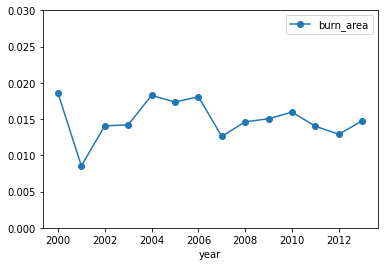

In [ ]:
# Check for yearly trends of the burn_area by plotting a mean of the burn_area for each year
train.groupby('year').mean().reset_index().plot(x='year', y='burn_area', ylim=(0, 0.03), marker='o')

There has been a general decrease in the size of the burn area which may have been as a result of a reduction in forest fires since 2003. There has been a almost constant area exposed to forest fires since 2006 with slight fluctuations to date

In [ ]:
# Do a cyclic transformation to the date so we train the model with the month and year only. This allows the model learn from the data with time being considered in a cyclic format i.e. in the case of months the gap between each month is 1 even for month 12 and month 1. This prevents the model from cosidering month 12 and 1 as being too far apart
# x (sin) = sin(2∗π∗x / max(x)))
# x (cos) = cos(2∗π∗x / max(x)))

def cyclicTransform(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)

    return data

train = cyclicTransform(train, 'month', 12)

train.head()

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,month,year,month_sin,month_cos
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,158.387765,8.000000,498.913776,2143.430034,0.0,206.935453,323.873675,2508.795159,115.989282,129.825024,590.564102,0.0,0.0,0.350169,0.0,0.649524,0.0,0.000307,0.0,0.0,2.214262,0.198996,4,2000,0.866025,-0.5
1,1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,164.645065,8.104576,590.346191,2132.253953,0.0,204.835170,321.838884,2500.432319,112.619789,129.471370,611.544277,0.0,0.0,0.429049,0.0,0.570644,0.0,0.000307,0.0,0.0,3.833042,0.188071,4,2000,0.866025,-0.5
2,2_2000-04-01,2,2000-04-01,25.443,5.074,0.000000,1240.449964,0.0,-200.503858,1240.449964,163.699542,8.027851,536.613938,2139.632626,0.0,207.001206,321.846757,2519.259344,112.378707,127.550639,594.188987,0.0,0.0,0.238300,0.0,0.761700,0.0,0.000000,0.0,0.0,1.927303,0.211730,4,2000,0.866025,-0.5
3,3_2000-04-01,3,2000-04-01,25.665,5.070,0.000000,1229.240077,0.0,-177.011032,1229.240077,172.996043,8.820002,648.271615,2125.206979,0.0,204.127473,319.348123,2493.392613,109.132390,131.703082,645.362481,0.0,0.0,0.488146,0.0,0.511854,0.0,0.000000,0.0,0.0,1.878281,0.215403,4,2000,0.866025,-0.5
4,4_2000-04-01,4,2000-04-01,25.886,5.067,0.000307,1224.093679,0.0,-153.256111,1224.093679,178.396749,9.000000,719.423119,2114.709813,0.0,203.295123,318.639735,2487.984467,108.161469,133.354846,660.372381,0.0,0.0,0.322243,0.0,0.677757,0.0,0.000000,0.0,0.0,1.968818,0.199975,4,2000,0.866025,-0.5


In [ ]:
# Split data to train the model
from sklearn.model_selection import train_test_split

train.drop(['ID', 'date'], axis=1, inplace=True)
x = train.drop('burn_area', axis=1)
y = train['burn_area']

X_train, X_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the model
ridge = RidgeCV()
ridge.fit(X_train, y_train)

# Make predictions
preds = ridge.predict(X_valid)

# Score
mean_squared_error(y_valid, preds)**0.5

0.0502241326738141

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit the model
gbreg = GradientBoostingRegressor(random_state=21)
gbreg.fit(X_train, y_train)

# Make predictions
preds = gbreg.predict(X_valid)

# Score
mean_squared_error(y_valid, preds)**0.5

0.03995208469049252

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=10)
adaboost.fit(X_train, y_train)

preds = adaboost.predict(X_valid)

# Score
mean_squared_error(y_valid, preds)**0.5

0.05183230390655427

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor()
randomforest.fit(X_train, y_train)

preds = randomforest.predict(X_valid)

# Score
mean_squared_error(y_valid, preds)**0.5

0.02321535279585758

In [ ]:
!pip install catboost

     |████████████████████████████████| 64.8MB 47kB/s 


In [ ]:
from catboost import CatBoostRegressor

# Create the model
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

preds = catboost.predict(X_valid)

# Score
mean_squared_error(y_valid, preds)**0.5

Learning rate set to 0.118038
0:	learn: 0.0583678	total: 128ms	remaining: 2m 7s
1:	learn: 0.0556636	total: 204ms	remaining: 1m 41s
2:	learn: 0.0534306	total: 273ms	remaining: 1m 30s
3:	learn: 0.0515703	total: 340ms	remaining: 1m 24s
4:	learn: 0.0500597	total: 420ms	remaining: 1m 23s
5:	learn: 0.0487408	total: 495ms	remaining: 1m 22s
6:	learn: 0.0476959	total: 574ms	remaining: 1m 21s
7:	learn: 0.0467363	total: 648ms	remaining: 1m 20s
8:	learn: 0.0458547	total: 714ms	remaining: 1m 18s
9:	learn: 0.0450520	total: 785ms	remaining: 1m 17s
10:	learn: 0.0443844	total: 856ms	remaining: 1m 16s
11:	learn: 0.0438588	total: 928ms	remaining: 1m 16s
12:	learn: 0.0433959	total: 1s	remaining: 1m 16s
13:	learn: 0.0430321	total: 1.07s	remaining: 1m 15s
14:	learn: 0.0426960	total: 1.14s	remaining: 1m 14s
15:	learn: 0.0423163	total: 1.21s	remaining: 1m 14s
16:	learn: 0.0420075	total: 1.27s	remaining: 1m 13s
17:	learn: 0.0417613	total: 1.35s	remaining: 1m 13s
18:	learn: 0.0414527	total: 1.43s	remaining: 1m 

0.026170094070924566

In [ ]:
test.head(2)

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
0,0_2014-01-01,0,2014-01-01,25.447,5.296,0,142.756021,1217.926180,-953.401012,1360.571291,1.0,0.0,355.593690,2349.499157,0.0,187.541787,332.578998,2542.124518,111.013969,156.563945,590.564102,0.0,0.0,0.430648,0.0,0.569045,0.0,0.000307,0.0,0.0,2.773423,0.000457
1,1_2014-01-01,1,2014-01-01,25.669,5.293,0,154.836847,1193.866315,-961.703043,1348.688788,1.0,0.0,382.206636,2340.597389,0.0,185.895903,330.826066,2551.085649,106.576545,158.165429,611.544277,0.0,0.0,0.494624,0.0,0.505068,0.0,0.000307,0.0,0.0,4.697883,0.000129


In [ ]:
# Do the same manipulations as with the train dataset
test['population_density'] = test['population_density'].fillna(method='bfill')
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year
test = cyclicTransform(test, 'month', 12)


test_X = test.drop(['ID', 'date'], axis=1)
preds = catboost.predict(test_X)

In [ ]:
# Creating submission file
ss = pd.read_csv('/content/drive/My Drive/Umoja_Hack Datasets/UmojaHack#3_Hotspots/SampleSubmission.csv')

sub_df = pd.DataFrame({'ID': test['ID'], 'burn_area': preds})
sub_df.to_csv('submission.csv', index = False)

In [ ]:
# Creating submission file
sub_df = pd.DataFrame({'ID': test['ID'], 'burn_area': preds})
sub_df.to_csv('submission.csv', index = False)